In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras 
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
from keras.models import load_model
import cv2
import glob

In [33]:
import os
path,dir,files = next(os.walk('./data/flowers'))
file_count = len(files)
print("Number of images: ",file_count)

Number of images:  600


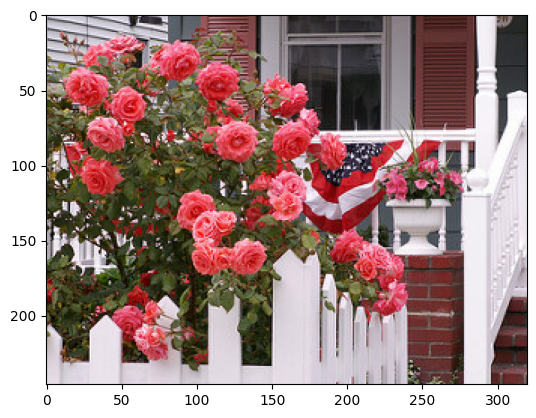

In [34]:
img = mpimg.imread('./data/flowers/rose_(10).jpg')
imgplot = plt.imshow(img)
plt.show()

In [35]:
path,dir,files = next(os.walk('./data/flowers'))
print(files[0])

rose_(1).jpg


In [36]:
rose = []
sunflower = []

for i in range(len(files)):
    if files[i][0:4] == 'rose':
        rose.append(files[i])
    elif files[i][0:9] == 'sunflower':
        sunflower.append(files[i])
    
print(len(rose),len(sunflower))

300 300


In [37]:
original_path = './data/flowers'
new_path = 'compressed_images/'
os.mkdir(new_path)

In [38]:
for i in range(len(files)):
    filename = os.listdir(path)[i]
    f_img = path+"/"+filename
    img = Image.open(f_img)
    img = img.resize((224, 224))
    img = img.convert('RGB')
    new_img_path = new_path+'/'+filename
    img.save(new_img_path)

In [39]:
from PIL import Image
import os, sys

def resize_rename_rotate(srcdir,srcfile, targetdir="", size=(224,224)):
  src_path = srcdir+srcfile

  targetfile = os.path.splitext(srcfile)
  extension = os.path.splitext(srcfile)[1]
     
  if srcfile != targetfile:
     try :
         im = Image.open(src_path)
         im = im.rotate(90)
         im = im.resize(size) 
         im.save(targetdir+targetfile[0]+'__'+".jpg")
     except IOError as io:
         print ("cannot change image for ", srcfile)

if __name__=="__main__":
  targetdir = "compressed_images1/"
  srcdir = "compressed_images/"

  for file in os.listdir(srcdir):
     resize_rename_rotate(srcdir,file,targetdir)

cannot change image for  rose_(1).jpg
cannot change image for  rose_(10).jpg
cannot change image for  rose_(100).jpg
cannot change image for  rose_(101).jpg
cannot change image for  rose_(102).jpg
cannot change image for  rose_(103).jpg
cannot change image for  rose_(104).jpg
cannot change image for  rose_(105).jpg
cannot change image for  rose_(106).jpg
cannot change image for  rose_(107).jpg
cannot change image for  rose_(108).jpg
cannot change image for  rose_(109).jpg
cannot change image for  rose_(11).jpg
cannot change image for  rose_(110).jpg
cannot change image for  rose_(111).jpg
cannot change image for  rose_(112).jpg
cannot change image for  rose_(113).jpg
cannot change image for  rose_(114).jpg
cannot change image for  rose_(115).jpg
cannot change image for  rose_(116).jpg
cannot change image for  rose_(117).jpg
cannot change image for  rose_(118).jpg
cannot change image for  rose_(119).jpg
cannot change image for  rose_(12).jpg
cannot change image for  rose_(120).jpg
canno

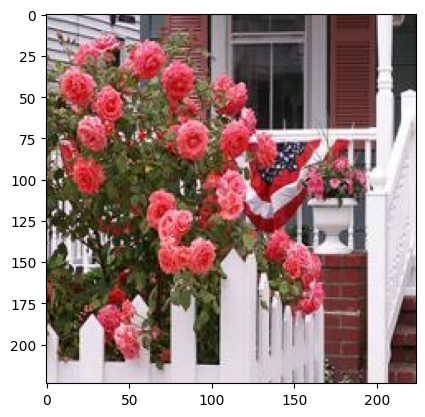

In [40]:
img = mpimg.imread(r'./compressed_images/rose_(10).jpg')
imgplot = plt.imshow(img)
plt.show()

In [41]:
image_directory = 'compressed_images/'
image_extensions = ['png','jpg','jpeg']

files = []
[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extensions]
flower_images = np.asarray([cv2.imread(file) for file in files])

In [42]:
flower_images.shape

(600, 224, 224, 3)

In [43]:
filenames = os.listdir('compressed_images/')

In [44]:
labels = []
for i in range(0,len(filenames)):
        # print(filenames)
        if filenames[i][0:4] == 'rose':
                labels.append(0)
        elif filenames[i][0:9] == 'sunflower':
                labels.append(1)   
print(len(labels))

600


In [45]:
labels.count(0), labels.count(1)

(300, 300)

In [46]:
X = flower_images
Y = np.asarray(labels)

In [47]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [48]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=35,stratify=Y)

In [49]:
Y_train.shape,Y_test.shape

((480,), (120,))

In [50]:
X_train_scaled = X_train/255

In [51]:
X_test_scaled = X_test/255

In [52]:
X_train_scaled.shape, Y_train.shape

((480, 224, 224, 3), (480,))

In [53]:
import tensorflow_hub as hub

In [54]:
# mobile_net_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
res_net_model = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'
pretrained_model = hub.KerasLayer(res_net_model,input_shape=(224,224,3),trainable=False)

In [70]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Drop
out

In [73]:
number_of_classes = 2

retrained_model = hub._ensure_keras_2_importable(res_net_model,input_shape=(None, 2048))

model = Sequential()

model.add(pretrained_model)

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))

model.add(Dense(2,activation='softmax'))
model.summary()

TypeError: _ensure_keras_2_importable() got an unexpected keyword argument 'input_shape'

In [57]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [58]:
history = model.fit(X_train_scaled,Y_train,epochs=30,validation_split=0.25,batch_size=16)

Epoch 1/30




c:\Users\Srushti\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend\tensorflow\nn.py:625: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 ━━━━━━━━━━━━━━━━━━━━ 24s 750ms/step - acc: 0.8490 - loss: 0.4960 - val_acc: 0.9333 - val_loss: 0.1623
Epoch 2/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 16s 706ms/step - acc: 0.9692 - loss: 0.0580 - val_acc: 0.9583 - val_loss: 0.3081
Epoch 3/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 740ms/step - acc: 0.9813 - loss: 0.0899 - val_acc: 0.9333 - val_loss: 0.3078
Epoch 4/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 760ms/step - acc: 0.9833 - loss: 0.0229 - val_acc: 0.9417 - val_loss: 0.2952
Epoch 5/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 748ms/step - acc: 1.0000 - loss: 0.0034 - val_acc: 0.9167 - val_loss: 0.3750
Epoch 6/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 726ms/step - acc: 1.0000 - loss: 4.1767e-04 - val_acc: 0.9333 - val_loss: 0.3450
Epoch 7/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 729ms/step - acc: 1.0000 - loss: 3.3756e-04 - val_acc: 0.9500 - val_loss: 0.4215
Epoch 8/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 725ms/step - acc: 1.0000 - loss: 5.0690e-04 - val_acc: 0.9083 - val_loss: 0.3959
Epoch 9/30
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 736ms

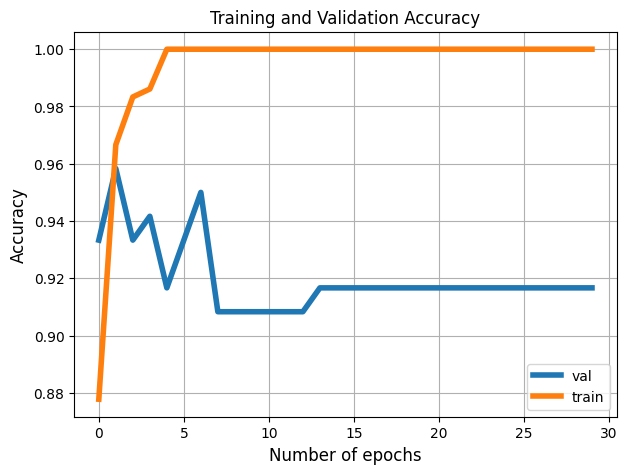

In [59]:
plt.figure(figsize=(7,5))
plt.plot(history.history['val_acc'],linewidth = 4)
plt.plot(history.history['acc'],linewidth = 4)

plt.title("Training and Validation Accuracy",fontsize=12)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['val','train'],loc = 'lower right')
plt.grid()

plt.show()

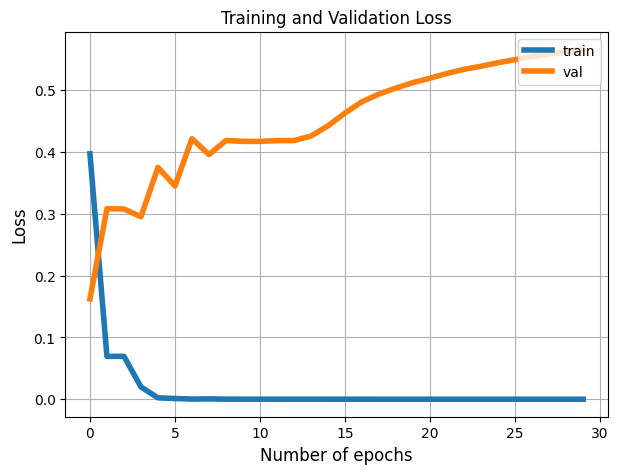

In [60]:
plt.figure(figsize=(7,5))
plt.plot(history.history['loss'],linewidth = 4)
plt.plot(history.history['val_loss'],linewidth = 4)

plt.title("Training and Validation Loss",fontsize=12)
plt.ylabel("Loss",fontsize=12)
plt.xlabel("Number of epochs",fontsize=12)
plt.legend(['train','val'],loc = 'upper right')
plt.grid()
plt.show()

In [61]:
score,acc = model.evaluate(X_test_scaled,Y_test)
print("Test Loss = ",score)
print("Test Acc = ",acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 943ms/step - acc: 0.9352 - loss: 0.6347
Test Loss =  0.4219909608364105
Test Acc =  0.949999988079071


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step
1
Sunflower


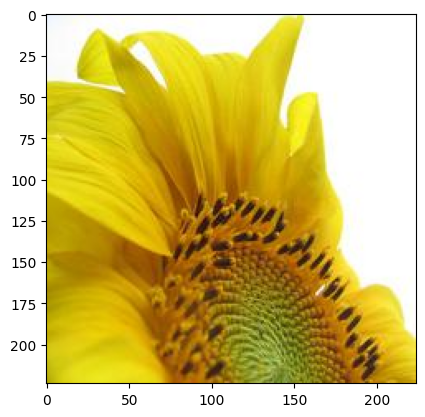

In [62]:
img_test = cv2.imread('./compressed_images/sunflower_(7).jpg')
img_resize = cv2.resize(img_test,(224,224))
plt.imshow(mpimg.imread('./compressed_images/sunflower_(7).jpg'))
img_scaled = img_resize/255
img_reshaped = np.reshape(img_scaled,[1,224,224,3])
input_pred = model.predict(img_reshaped)
input_label = np.argmax(input_pred)
print(input_label)

if input_label == 0:
    print("Rose")
elif input_label == 1:
    print("Sunflower")


In [63]:
model.save('flower_model.h5')

In [64]:
from tensorflow.keras.models import load_model

In [65]:
load_models = load_model('flower_model.h5',custom_objects={'KerasLayer':hub.KerasLayer})


ValueError: Sequential model 'sequential_2' has already been configured to use input shape (None, 224, 224, 3). You cannot build it with input_shape [None, 224, 224, 3]